In [49]:
#21BAI1869
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score

In [32]:
df=pd.read_csv('/content/set2data (1).csv')   #21BAI!869
df.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [33]:
df.dtypes   #21BAI1869

User ID            float64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [34]:
df.isnull()   #21BAI1869

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,True,False
397,True,False,False,False,False
398,False,False,False,False,False


In [35]:
df.isnull().sum()   #21BAI1869

User ID            18
Gender              6
Age                22
EstimatedSalary    17
Purchased           0
dtype: int64

In [36]:
#21BAI1869
df = df.dropna(subset=['User ID'])
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['User ID'].isnull().sum()

0

In [37]:
#21BAI1869
mean_male = df.loc[df['Gender'] == 1, 'Age'].mean()
mean_female = df.loc[df['Gender'] == 0, 'Age'].mean()
mean_male_sal = df.loc[df['Gender'] == 1, 'EstimatedSalary'].mean()
mean_female_sal = df.loc[df['Gender'] == 0, 'EstimatedSalary'].mean()

# Sir, Here we are filling all the values in the locations where gender is male female and place is empty.
# This method is different from what we practiced in lab but it is more easier in my opinion.
df.loc[(df['Gender'] == 1) & (df['Age'].isnull()), 'Age'] = mean_male
df.loc[(df['Gender'] == 0) & (df['Age'].isnull()), 'Age'] = mean_female
df.loc[(df['Gender'] == 1) & (df['EstimatedSalary'].isnull()), 'EstimatedSalary'] = mean_male_sal
df.loc[(df['Gender'] == 0) & (df['EstimatedSalary'].isnull()), 'EstimatedSalary'] = mean_female_sal

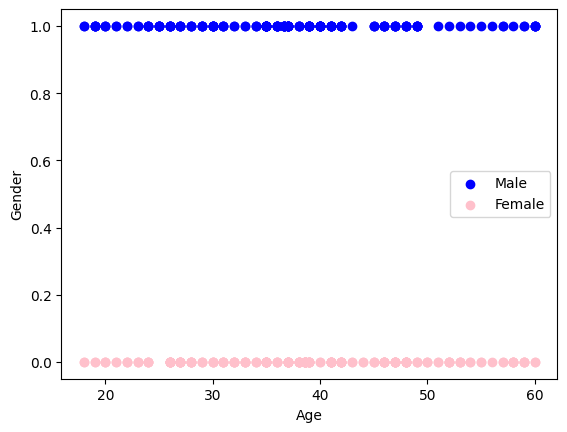

In [38]:
#21BAI1869
plt.scatter(df[df['Gender'] == 1]['Age'], df[df['Gender'] == 1]['Gender'], color='blue')
plt.scatter(df[df['Gender'] == 0]['Age'], df[df['Gender'] == 0]['Gender'], color='Pink')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(['Male', 'Female'])
plt.show()

In [40]:
#21BAI1869
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
#21BAI1869
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [44]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,1,19.0,19000.000000,0
1,15810944.0,0,35.0,20000.000000,0
2,15668575.0,0,26.0,43000.000000,0
3,15603246.0,0,27.0,70549.504950,0
4,15804002.0,1,19.0,70152.439024,0
...,...,...,...,...,...
394,15757632.0,0,39.0,59000.000000,0
395,15691863.0,0,46.0,41000.000000,1
396,15706071.0,1,51.0,70152.439024,1
398,15755018.0,1,36.0,33000.000000,0


In [56]:
#21BAI1869    ##for scaled model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [58]:
#21BAI1869
y_pred = regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean squared error:',mse)
print('R_square:',r2)
print('Root Mean squared error:',rmse)
accuracy=accuracy_score(y_pred,y_test)
print('Model Accuracy(for scaled): ',accuracy)

Mean squared error: 0.17391304347826086
R_square: 0.26984126984126977
Root Mean squared error: 0.41702882811414954
Model Accuracy(for scaled):  0.8260869565217391
